<a href="https://colab.research.google.com/github/ShrivatsaMishra/NLP_Final_Project/blob/main/Avengers_Ensemble!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


# Function to combine model predictions into a single DataFrame
def combine_model_predictions(*files):
    combined_df = None

    for file in files:
        # Read each file
        df = pd.read_csv(file)

        # Drop the 'label' column from all except the first file
        if combined_df is not None:
            df = df.drop(columns=['label'])

        # Combine
        if combined_df is None:
            combined_df = df
        else:
            combined_df = pd.merge(combined_df, df, on='id')

    return combined_df

In [ ]:
# Combine training data
train_files = ['/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_train_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_train_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_train_predictions.csv']
train_df = combine_model_predictions(*train_files)

# Combine development data
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']
dev_df = combine_model_predictions(*dev_files)

# Prepare training and development datasets
X_train = train_df.drop(columns=['id', 'label'])
y_train = train_df['label']
X_dev = dev_df.drop(columns=['id', 'label'])
y_dev = dev_df['label']

# Define the hyperparameter grid
param_grid = {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
model = LogisticRegression()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

dev_predictions = best_model.predict(X_dev)

# Evaluate the model
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Accuracy on Development Data:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on Development Data: 0.86
Precision: 0.9648760330578512
Recall: 0.7472
F1 Score: 0.842200180342651


In [ ]:
# Combine training data
train_files = ['/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_train_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_train_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_train_predictions.csv']
train_df = combine_model_predictions(*train_files)

# Combine development data
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']
dev_df = combine_model_predictions(*dev_files)

# Prepare training and development datasets
X_train = train_df.drop(columns=['id', 'label'])
y_train = train_df['label']
X_dev = dev_df.drop(columns=['id', 'label'])
y_dev = dev_df['label']

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions on the development set
dev_predictions = model.predict(X_dev)

# Evaluate the model
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Accuracy on Development Data:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy on Development Data: 0.86
Precision: 0.9648760330578512
Recall: 0.7472
F1 Score: 0.842200180342651


In [ ]:
# Combine training data
train_files = ['/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_train_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_train_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_train_predictions.csv']
train_df = combine_model_predictions(*train_files)

# Combine development data
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']
dev_df = combine_model_predictions(*dev_files)

# Prepare training and development datasets
X_train = train_df.drop(columns=['id', 'label'])
y_train = train_df['label']
X_dev = dev_df.drop(columns=['id', 'label'])
y_dev = dev_df['label']

param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (5, 5), (10, 5)],
    'alpha': [0.0001, 0.001, 0.01],
}

# Create an MLPClassifier model
model = MLPClassifier()


# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

dev_predictions = best_model.predict(X_dev)

# Evaluate the model
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Accuracy on Development Data:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............alpha=0.0001, hidden_layer_sizes=(5,); total time=   8.1s
[CV] END ..............alpha=0.0001, hidden_layer_sizes=(5,); total time=   8.6s
[CV] END ..............alpha=0.0001, hidden_layer_sizes=(5,); total time=   6.2s
[CV] END ..............alpha=0.0001, hidden_layer_sizes=(5,); total time=   5.2s
[CV] END ..............alpha=0.0001, hidden_layer_sizes=(5,); total time=  12.4s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(10,); total time=   6.4s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(10,); total time=   6.7s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(10,); total time=   4.7s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(10,); total time=   4.7s
[CV] END .............alpha=0.0001, hidden_layer_sizes=(10,); total time=   6.5s
[CV] END ............alpha=0.0001, hidden_layer_sizes=(5, 5); total time=   4.1s
[CV] END ............alpha=0.0001, hidden_layer_

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(10, 20),
    activation='relu',
    solver='adam',
    alpha=0.01,
    max_iter=200,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=True,
)

model.fit(X_train, y_train)

# Predictions on the development set
dev_predictions = model.predict(X_dev)

# Evaluate the model
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Accuracy on Development Data:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Iteration 1, loss = 0.20909273
Validation score: 0.985805
Iteration 2, loss = 0.04000961
Validation score: 0.993236
Iteration 3, loss = 0.03238062
Validation score: 0.993236
Iteration 4, loss = 0.03146187
Validation score: 0.993236
Iteration 5, loss = 0.03127405
Validation score: 0.993236
Iteration 6, loss = 0.03112904
Validation score: 0.993236
Iteration 7, loss = 0.03116348
Validation score: 0.993236
Iteration 8, loss = 0.03107076
Validation score: 0.993236
Iteration 9, loss = 0.03104106
Validation score: 0.993236
Iteration 10, loss = 0.03100365
Validation score: 0.993236
Iteration 11, loss = 0.03102151
Validation score: 0.993236
Iteration 12, loss = 0.03090180
Validation score: 0.993236
Iteration 13, loss = 0.03096157
Validation score: 0.993236
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy on Development Data: 0.86
Precision: 0.9648760330578512
Recall: 0.7472
F1 Score: 0.842200180342651


In [ ]:
dev_predictions = best_model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, dev_predictions)
precision = precision_score(y_train, dev_predictions)
recall = recall_score(y_train, dev_predictions)
f1 = f1_score(y_train, dev_predictions)

print("Accuracy on Development Data:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy on Development Data: 0.9938124702522608
Precision: 0.9894831255166107
Recall: 0.9974648087082935
F1 Score: 0.9934579356741151


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to read and combine model predictions
def read_and_combine_predictions(*files):
    combined_predictions = []

    for file in files:
        df = pd.read_csv(file)
        # Check if the column is named 'prediction' or 'predictions'
        if 'prediction' in df.columns:
            combined_predictions.append(df['prediction'])
        elif 'predictions' in df.columns:
            combined_predictions.append(df['predictions'])
        else:
            raise KeyError(f"Neither 'prediction' nor 'predictions' column found in {file}")

    combined_df = pd.concat(combined_predictions, axis=1)
    return combined_df

# Read and combine development predictions
# Combine development data
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']
dev_combined = read_and_combine_predictions(*dev_files)

# Read true labels (assuming the label is in the first file)
true_labels = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv')['label']

# Perform hard voting
votes = dev_combined.mode(axis=1)[0]

# Calculate metrics
accuracy = accuracy_score(true_labels, votes)
precision = precision_score(true_labels, votes)
recall = recall_score(true_labels, votes)
f1 = f1_score(true_labels, votes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8658
Precision: 0.8909790508764429
Recall: 0.8336
F1 Score: 0.8613349865674725


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to read and combine model predictions
def read_and_combine_predictions(*files):
    combined_predictions = []

    for file in files:
        df = pd.read_csv(file)
        # Check if the column is named 'prediction' or 'predictions'
        if 'prediction' in df.columns:
            combined_predictions.append(df['prediction'])
        elif 'predictions' in df.columns:
            combined_predictions.append(df['predictions'])
        else:
            raise KeyError(f"Neither 'prediction' nor 'predictions' column found in {file}")

    combined_df = pd.concat(combined_predictions, axis=1)
    return combined_df

# Read and combine development predictions
# Combine development data
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
              #  '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']
dev_combined = read_and_combine_predictions(*dev_files)

# Read true labels (assuming the label is in the first file)
true_labels = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv')['label']

# Perform hard voting
votes = dev_combined.mode(axis=1)[0]

# Calculate metrics
accuracy = accuracy_score(true_labels, votes)
precision = precision_score(true_labels, votes)
recall = recall_score(true_labels, votes)
f1 = f1_score(true_labels, votes)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8756
Precision: 0.8511593118922962
Recall: 0.9104
F1 Score: 0.8797835330498648


In [ ]:
dev_df

,id,label,prediction_x,prediction_y,prediction,predictions
0,0,1,1,1,0,1
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,3,1,1,1,1,1
4,4,1,0,1,1,1
...,...,...,...,...,...,...
4995,4995,0,0,0,1,1
4996,4996,0,0,0,0,0
4997,4997,0,0,0,0,0
4998,4998,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to read and combine model predictions
def read_and_combine_predictions(*files):
    combined_predictions = []

    for file in files:
        df = pd.read_csv(file)
        # Check if the column is named 'prediction' or 'predictions'
        if 'prediction' in df.columns:
            combined_predictions.append(df[['id', 'prediction']])
        elif 'predictions' in df.columns:
            combined_predictions.append(df[['id', 'predictions']])
        else:
            raise KeyError(f"Neither 'prediction' nor 'predictions' column found in {file}")

    # Concatenate all dataframes on the 'id' column
    combined_df = pd.concat(combined_predictions, axis=1)
    # Drop duplicate columns (especially the 'id' column)
    combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]
    return combined_df

# Specify file paths
train_files = ['/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_train_predictions.csv',
               '/content/drive/MyDrive/Task A/bert_train_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_train_predictions.csv']
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
             '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
             '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
             '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']

# Combine predictions
train_df = read_and_combine_predictions(*train_files)
dev_df = read_and_combine_predictions(*dev_files)

# Prepare datasets
X_train = train_df.drop(columns=['id'])
y_train = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv')['label']
X_dev = dev_df.drop(columns=['id'])
y_dev = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv')['label']

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dev_predictions = dt_model.predict(X_dev)
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Decision Tree - Accuracy:", accuracy)
print("Decision Tree - Precision:", precision)
print("Decision Tree - Recall:", recall)
print("Decision Tree - F1 Score:", f1)


Decision Tree - Accuracy: 0.8482
Decision Tree - Precision: 0.9333001493280239
Decision Tree - Recall: 0.75
Decision Tree - F1 Score: 0.8316699933466402


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to read and combine model predictions
def read_and_combine_predictions(*files):
    combined_predictions = []

    for file in files:
        df = pd.read_csv(file)
        # Check if the column is named 'prediction' or 'predictions'
        if 'prediction' in df.columns:
            combined_predictions.append(df[['id', 'prediction']])
        elif 'predictions' in df.columns:
            combined_predictions.append(df[['id', 'predictions']])
        else:
            raise KeyError(f"Neither 'prediction' nor 'predictions' column found in {file}")

    # Concatenate all dataframes on the 'id' column
    combined_df = pd.concat(combined_predictions, axis=1)
    # Drop duplicate columns (especially the 'id' column)
    combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]
    return combined_df

# Specify file paths
train_files = ['/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv',
               '/content/drive/MyDrive/Task A/ELECTRA_train_predictions.csv',
              #  '/content/drive/MyDrive/Task A/bert_train_predictions.csv',
               '/content/drive/MyDrive/Task A/xl_net_train_predictions.csv']
dev_files = ['/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv',
             '/content/drive/MyDrive/Task A/ELECTRA_dev_predictions.csv',
            #  '/content/drive/MyDrive/Task A/bert_dev_predictions.csv',
             '/content/drive/MyDrive/Task A/xl_net_dev_predictions.csv']

# Combine predictions
train_df = read_and_combine_predictions(*train_files)
dev_df = read_and_combine_predictions(*dev_files)

# Prepare datasets
X_train = train_df.drop(columns=['id'])
y_train = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_train_predictions.csv')['label']
X_dev = dev_df.drop(columns=['id'])
y_dev = pd.read_csv('/content/drive/MyDrive/Task A/RoBERTa_dev_predictions.csv')['label']

# Train and evaluate the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dev_predictions = dt_model.predict(X_dev)
accuracy = accuracy_score(y_dev, dev_predictions)
precision = precision_score(y_dev, dev_predictions)
recall = recall_score(y_dev, dev_predictions)
f1 = f1_score(y_dev, dev_predictions)

print("Decision Tree - Accuracy:", accuracy)
print("Decision Tree - Precision:", precision)
print("Decision Tree - Recall:", recall)
print("Decision Tree - F1 Score:", f1)

Decision Tree - Accuracy: 0.8482
Decision Tree - Precision: 0.9333001493280239
Decision Tree - Recall: 0.75
Decision Tree - F1 Score: 0.8316699933466402


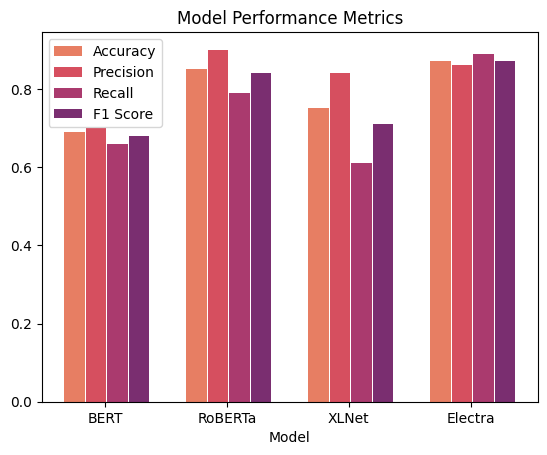

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate sample data
num_groups = 4
num_elements_per_group = 4

# data = np.random.rand(num_groups, num_elements_per_group)
data = np.array([[0.69, 0.70, 0.66, 0.68],
        [0.85, 0.90, 0.79, 0.84],
        [0.75, 0.84, 0.61, 0.71],
        [0.87, 0.86, 0.89, 0.87],
        ])
# Create an array of group names (e.g., G1, G2, G3, G4)
group_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create an array of element names (e.g., E1, E2, ..., E10)
element_names = ["BERT", "RoBERTa", "XLNet", "Electra"]

# Set up the bar chart
fig, ax = plt.subplots()
bar_width = 0.5  # Adjust the width of the bars as needed
bar_positions = np.arange(num_elements_per_group)*3

# Use a qualitative color palette from ColorBrewer
# colors = ['#4053d3', '#00b25d', '#e0bd64', '#00beff']
colors = sns.color_palette("flare", n_colors=num_groups)


# Plot the bars for each group with the specified colors
for i in range(num_groups):
    ax.bar(bar_positions + i * (bar_width+0.03), data[:,i], bar_width, label=group_names[i], color=colors[i])

# Set labels, title, and legend
ax.set_xlabel('Model')
ax.set_title('Model Performance Metrics')
ax.set_xticks(bar_positions + (bar_width * (num_groups - 1)) / 2)
ax.set_xticklabels(element_names)
ax.legend()
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Show the plot
plt.show()


In [ ]:
data = [[0.69, 0.70, 0.66, 0.68],
        [0.85, 0.90, 0.79, 0.84],
        [0.75, 0.84, 0.61, 0.71],
        [0.87, 0.86, 0.89, 0.87],
        ]

In [ ]:
data = np.array([0.7955557107925415, 0.6361551284790039, 0.7479572296142578, 0.6405811309814453, 0.6172107458114624, 0.8511326313018799, 0.6349664330482483, 0.5839971899986267, 0.7605407238006592, 0.7207387089729309, 0.682104229927063, 0.7562086582183838, 0.5306448936462402, 0.7159473299980164, 0.6810219287872314, 0.6654554605484009, 0.7192683219909668, 0.638005256652832, 0.4401819705963135, 0.6534498929977417, 0.6540931463241577, 0.5050479769706726, 1.0066262483596802, 0.6560821533203125, 0.9098057746887207, 0.5094276070594788, 0.6646571755409241, 0.7159094214439392, 0.6748403906822205, 0.8254934549331665, 0.5977471470832825, 0.7077001929283142, 0.697432279586792, 0.6548454165458679, 0.5250635147094727, 0.6172531843185425, 0.6058768033981323, 0.713686466217041, 0.7998492121696472, 0.7965219020843506, 0.7065877914428711, 0.6748049855232239, 0.6578251123428345, 0.6583146452903748, 0.7252753973007202, 0.7472589612007141, 0.6353396773338318, 0.5994361639022827, 0.5104407668113708, 0.6100005507469177, 0.7179660797119141, 0.5092556476593018, 0.7983192801475525, 0.5840373039245605, 0.5722404718399048, 0.4860868752002716, 0.6491003632545471, 0.7191833257675171, 0.5870182514190674, 0.5736854076385498, 0.4294531047344208, 0.8932441473007202, 0.8836937546730042, 0.7021602988243103, 0.7631367444992065, 0.5151100754737854, 0.4185165762901306, 0.822049617767334, 0.735489010810852, 0.5711156129837036, 0.7525212168693542, 0.5139585733413696, 0.7850481271743774, 0.6440356969833374, 0.6344916820526123, 0.7943213582038879, 0.5384873151779175, 0.6529966592788696, 0.5667535662651062, 0.871622622013092, 0.6533797979354858, 0.7088133096694946, 0.7100790739059448, 0.6489329934120178, 0.5975779891014099, 0.6409991383552551, 0.6709190607070923, 0.4881051480770111, 0.8511967658996582, 0.8043516278266907, 0.6639907360076904, 0.6902049779891968, 0.5678043365478516, 0.5421234965324402, 0.7151482105255127, 0.7871524095535278, 0.48164811730384827, 0.6695616841316223, 0.6182361245155334, 0.4706222712993622, 0.495071679353714, 0.3022440969944, 0.9016863703727722, 0.7661036849021912, 0.7940824627876282, 0.5865005850791931, 0.7862537503242493, 0.7073215246200562, 0.7949753999710083, 0.7650220990180969, 0.7379964590072632, 0.5720345377922058, 0.6224856972694397, 0.690795361995697, 0.8166862726211548, 0.8143786191940308, 0.7239564061164856, 0.6156467795372009, 0.7093694806098938, 0.7294201850891113, 0.6564609408378601, 0.7042309641838074, 0.7126720547676086, 0.7308911085128784, 0.7759159803390503, 0.7142711281776428, 0.7034525275230408, 0.748181164264679, 0.70918869972229, 0.6556546092033386, 0.6570199728012085, 0.6751112937927246, 0.5797353386878967, 0.7169796228408813, 0.7736899852752686, 0.9078186750411987, 0.8075532913208008, 0.774756669998169, 0.9530736207962036, 0.5268885493278503, 0.8189404010772705, 0.8550718426704407, 0.6934537887573242, 0.6944143772125244, 0.6712331771850586, 0.6618139147758484, 0.7088333964347839, 0.7390727996826172, 0.7300936579704285, 0.5336062908172607, 0.6855280995368958, 0.7691625356674194, 0.6498448848724365, 0.7012370824813843, 0.6899674534797668, 0.5013109445571899, 0.7236127853393555, 0.4132006764411926, 0.6799094676971436, 0.9188527464866638, 0.5718119740486145, 0.5199466943740845, 0.674261212348938, 0.5806361436843872, 0.6706393957138062, 0.3571653664112091, 0.3446008861064911, 0.6373893022537231, 1.0674594640731812, 1.1001026630401611, 0.9310228824615479, 0.6118150949478149, 0.6503894329071045, 0.8656712174415588, 0.7129302024841309, 0.6966278553009033, 0.5527095198631287, 0.9004272818565369, 0.7245610952377319, 0.6558387875556946, 0.6780574917793274, 0.7708635926246643, 0.8153167963027954, 0.630313515663147, 0.7761126160621643, 0.7018606066703796, 0.6306019425392151, 0.7157477140426636, 0.6609364748001099, 0.5665019154548645, 0.6643598675727844, 0.6109514832496643, 0.719855785369873, 0.7103042006492615, 0.5316836833953857, 0.5328320264816284, 0.6517678499221802, 0.6302087306976318, 0.6798126697540283, 0.6120852828025818, 0.618233323097229, 0.7058312296867371, 0.7407284379005432, 0.7416130900382996, 0.5140699744224548, 0.705208420753479, 0.508927047252655, 0.8480085730552673, 0.5245755314826965, 0.7435094714164734, 0.5860981345176697, 0.3957793116569519, 0.6651302576065063, 0.5080260038375854, 0.9055712223052979, 0.6057080030441284, 0.7011386752128601, 0.47587981820106506, 0.5072978138923645, 0.5492746233940125, 0.5703843832015991, 0.3905206322669983, 0.636027455329895, 0.6642126441001892, 0.5873264074325562, 0.4814390242099762, 0.5346531867980957, 0.4628639817237854, 0.871828556060791, 0.5445604920387268, 0.9025556445121765, 0.7905961275100708, 0.652023434638977, 0.634501039981842, 0.6622738838195801, 0.6612417101860046, 0.696312665939331, 0.46841907501220703, 0.7561331391334534, 0.5924642086029053, 0.7094035148620605, 0.651444673538208, 0.5275962948799133, 0.6293925046920776, 0.6560530066490173, 0.5328822135925293, 0.9520560503005981, 0.6571078300476074, 0.45756256580352783, 0.6249918937683105, 0.5343618988990784, 0.49383729696273804, 0.5566708445549011, 0.5314947366714478, 0.6001237034797668, 0.5902474522590637, 0.7311272025108337, 0.6115022897720337, 0.6605710983276367, 0.5982191562652588, 0.6535531282424927, 0.8082848191261292, 0.7019128203392029, 0.5855603218078613, 0.4722362160682678, 0.8359039425849915, 0.8946667909622192, 0.6385412812232971, 0.5826249122619629, 0.5082775354385376, 0.6307423710823059, 0.6710054874420166, 0.5790554285049438, 0.608088493347168, 0.4958871006965637, 0.5733988285064697, 0.7379592657089233, 0.5540107488632202, 0.5206711888313293, 0.6501257419586182, 0.5740906596183777, 0.5564277768135071, 0.4694102704524994, 0.5100994110107422, 0.865961492061615, 0.4558762311935425, 0.5053651928901672, 0.6507775187492371, 0.7428666949272156, 0.44544368982315063, 0.5869561433792114, 0.4480714201927185, 0.4526624083518982, 0.22234337031841278, 0.6732922792434692, 0.7776840925216675, 0.5164117217063904, 0.8563423752784729, 0.5461755394935608, 0.5934679508209229, 0.7150102853775024, 0.6115437746047974, 0.3564795255661011, 0.492790549993515, 0.47055691480636597, 0.6262986063957214, 0.5617864727973938, 0.4875834882259369, 0.4438742697238922, 0.5584781169891357, 0.49897661805152893, 0.6149381399154663, 0.32050591707229614, 0.7537674903869629, 0.5375021696090698, 0.40406161546707153, 0.3709445595741272, 0.5464719533920288, 0.5822994709014893, 0.4190049469470978, 0.4637160003185272, 0.38735711574554443, 0.3772699534893036, 0.3921567499637604, 0.5026960968971252, 0.11055978387594223, 0.20737840235233307, 0.5808230638504028, 0.24951761960983276, 0.32036224007606506, 0.2621793746948242, 0.3021564781665802, 0.6182876229286194, 0.46911847591400146, 0.7689375877380371, 0.8770508766174316, 0.34828028082847595, 0.4249405860900879, 0.08831920474767685, 0.9110301733016968, 0.42245015501976013, 0.43162623047828674, 0.14590668678283691, 0.3385605812072754, 0.9082585573196411, 0.2732250988483429, 0.2582385540008545, 0.45066219568252563, 0.5476346611976624, 0.6103928089141846, 0.392613023519516, 0.6262873411178589, 0.8080812096595764, 0.621812641620636, 0.557969331741333, 0.48567280173301697, 0.37651365995407104, 0.13062039017677307, 0.2118958681821823, 0.664207398891449, 0.34250327944755554, 0.8465651869773865, 0.25786346197128296, 0.2924853563308716, 0.4679078757762909, 0.9972867369651794, 0.6436536312103271, 0.6659053564071655, 0.48242124915122986, 0.4585655629634857, 0.5833997130393982, 0.6204721331596375, 0.18010260164737701, 0.410156786441803, 0.5023155808448792, 1.0263817310333252, 0.6566978096961975, 1.1731672286987305, 0.5513454675674438, 0.33814674615859985, 1.005150556564331, 0.4227275252342224, 0.435670405626297, 0.5290619134902954, 0.5535811185836792, 0.5545568466186523, 0.36422964930534363, 0.39394572377204895, 0.3573630750179291, 0.863246500492096, 0.47399893403053284, 0.3665792942047119, 0.8400880098342896, 0.25663965940475464, 0.5573627352714539, 0.7046387195587158, 0.3712976276874542, 0.44617122411727905, 0.6728507280349731, 0.5628988146781921, 0.4361284375190735, 0.44798389077186584, 0.4503931403160095, 0.585597574710846, 0.4341970384120941, 0.7152135968208313, 0.5247032046318054, 0.6325899362564087, 1.0352330207824707, 0.6110223531723022, 0.383575439453125, 0.5327019095420837, 0.22496460378170013, 0.8286499977111816, 0.3638831079006195, 0.5550656318664551, 0.348998486995697, 0.5255919098854065, 0.7100300788879395, 0.27318671345710754, 0.3810752332210541, 0.36177730560302734, 0.29608526825904846, 0.28345149755477905, 0.26599061489105225, 0.49344274401664734, 0.6304547786712646, 0.4533219635486603, 0.3951572775840759, 0.850921630859375, 0.47564929723739624, 0.223094642162323, 0.2893065810203552, 0.10745358467102051, 0.7158587574958801, 0.25922518968582153, 0.35244834423065186, 0.15715071558952332, 0.43229153752326965, 0.436276376247406, 0.3554224371910095, 0.9619906544685364, 0.13122352957725525, 0.25530052185058594, 0.33562153577804565, 0.4271915555000305, 0.24521388113498688, 0.38890379667282104, 0.6101024746894836, 0.4389069378376007, 0.2155819535255432, 0.40226757526397705, 0.4787851572036743, 0.6105204224586487, 0.38114288449287415, 0.6717159152030945, 0.5134680271148682, 0.19970330595970154, 0.6413213610649109, 0.32454535365104675, 0.5919355154037476, 0.5012539625167847, 0.5542577505111694, 0.5686332583427429, 0.7756968140602112, 0.28565356135368347, 0.42644965648651123, 0.5632694363594055, 0.24488860368728638, 0.2968248426914215, 0.4211598038673401, 0.3733488619327545, 0.4282664656639099, 0.784452497959137, 0.436127245426178, 0.32454991340637207, 0.26331573724746704, 0.6516167521476746, 0.1567288637161255, 0.21882355213165283, 0.4569855034351349, 0.260648250579834, 0.264967143535614, 0.18504241108894348, 0.20188069343566895, 0.3143751323223114, 0.09969047456979752, 0.41449251770973206, 0.4991987943649292, 0.19989995658397675, 0.298059344291687, 0.14341729879379272, 0.2675466537475586, 0.3356473743915558, 0.6146345734596252, 0.8455362319946289, 0.15299415588378906, 0.2849363088607788, 0.2600480020046234, 0.35776111483573914, 0.03782793506979942, 0.21672800183296204, 0.25345948338508606, 0.6526305675506592, 0.45279672741889954, 0.6432461738586426, 0.061220504343509674, 0.3650435209274292, 0.15290464460849762, 0.6241894960403442, 0.2449578046798706, 0.14322790503501892, 0.2726573944091797, 0.36237385869026184, 0.13236673176288605, 0.803192675113678, 0.400373637676239, 0.1359444260597229, 0.42177727818489075, 0.4500933289527893, 0.42620226740837097, 0.5771186947822571, 0.18682104349136353, 0.6936761140823364, 0.24729609489440918, 0.579111635684967, 0.3579048216342926, 0.8796011805534363, 0.37785255908966064, 0.40885424613952637, 0.36547547578811646, 0.4994950592517853, 0.3634580373764038, 0.3303857743740082, 0.3971661329269409, 0.45002007484436035, 0.42250856757164, 0.3222367763519287, 0.32095465064048767, 0.22466693818569183, 0.30461227893829346, 0.4422428011894226, 0.30558472871780396, 0.35699263215065, 0.5170319080352783, 0.8075810670852661, 0.4998275935649872, 0.5327671766281128, 1.0021014213562012, 0.5581064820289612, 0.3741874098777771, 0.5076081156730652, 0.18899403512477875, 0.22968041896820068, 0.29396653175354004, 0.49371328949928284, 0.42383939027786255, 0.23089496791362762, 0.46894267201423645, 0.34703388810157776, 0.2590988874435425, 0.12268060445785522, 0.33173567056655884]
)

# Save as CSV
np.savetxt('output.csv', data, delimiter=',')